In [1]:
from dotenv import load_dotenv
import os
from typing import Annotated, Sequence, TypedDict, Literal
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages
from langchain_core.prompts import PromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.graph import StateGraph, END, START

/Users/rhy/Library/CloudStorage/OneDrive-ArizonaStateUniversity/SelfStudy/Agentic & Gen AI with Cloud/agenticai/lib/python3.13/site-packages/IPython/core/interactiveshell.py:3667: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
load_dotenv()

True

In [3]:
os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY')

In [4]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI()

In [5]:
llm.invoke("What is the capital of France?")

AIMessage(content='The capital of France is Paris.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 14, 'total_tokens': 21, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BmpmSXxzP2xH1PiVVTsyG6qq1HSXL', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--9ea8caba-a088-4fb6-a34f-f4985d2e313e-0', usage_metadata={'input_tokens': 14, 'output_tokens': 7, 'total_tokens': 21, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [6]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

In [7]:
embeddings.embed_query("What is the capital of France?")

[-0.05558660626411438,
 0.04085923358798027,
 -0.012091625481843948,
 0.04258221387863159,
 -0.056530144065618515,
 -0.027403581887483597,
 0.022952551022171974,
 -0.011599346064031124,
 -0.02693181484937668,
 -0.008620026521384716,
 -0.0026767721865326166,
 0.00039484951412305236,
 -0.02643953450024128,
 -0.018265636637806892,
 0.01230699848383665,
 0.0007679053815081716,
 -0.0052971369586884975,
 0.016583679243922234,
 -2.0691941244876944e-05,
 0.007727769203484058,
 0.021044965833425522,
 -0.008409782312810421,
 -0.019434800371527672,
 -0.03903369605541229,
 0.0003938880399800837,
 0.008927701972424984,
 0.038541413843631744,
 -0.00912256259471178,
 0.035362109541893005,
 0.028695818036794662,
 0.07351379841566086,
 0.00417155958712101,
 0.01736312359571457,
 -0.01743491366505623,
 -0.0444282628595829,
 -0.004476670641452074,
 0.015065817162394524,
 0.015301700681447983,
 0.025208834558725357,
 0.0065842438489198685,
 0.009778935462236404,
 -0.01203009020537138,
 0.00712780281901359

In [8]:
len(embeddings.embed_query("What is the capital of France?"))

3072

In [9]:
url = "https://lilianweng.github.io/posts/2023-06-23-agent/"

In [10]:
from langchain_community.document_loaders import WebBaseLoader
loader = WebBaseLoader(url)

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [11]:
data = loader.load()
data[0].metadata

{'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/',
 'title': "LLM Powered Autonomous Agents | Lil'Log",
 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\

In [12]:
len(data[0].metadata['description'])

1639

In [13]:
data[0].page_content

'\n\n\n\n\n\nLLM Powered Autonomous Agents | Lil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n|\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\n\n\n\n\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\n \n\n\nTable of Contents\n\n\n\nAgent System Overview\n\nComponent One: Planning\n\nTask Decomposition\n\nSelf-Reflection\n\n\nComponent Two: Memory\n\nTypes of Memory\n\nMaximum Inner Product Search (MIPS)\n\n\nComponent Three: Tool Use\n\nCase Studies\n\nScientific Discovery Agent\n\nGenerative Agents Simulation\n\nProof-of-Concept Examples\n\n\nChallenges\n\nCitation\n\nReferences\n\n\n\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The

In [14]:
urls = ["https://lilianweng.github.io/posts/2023-06-23-agent/", "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/"]

In [15]:
docs = [WebBaseLoader(url).load() for url in urls]
docs

[[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final res

In [16]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=100, chunk_overlap=25)

In [17]:
docs_list = [item for sublist in docs for item in sublist]

In [18]:
doc_splits = text_splitter.split_documents(docs_list)

In [19]:
doc_splits

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [20]:
from langchain_community.vectorstores import Chroma
vectorstore = Chroma.from_documents(documents = doc_splits, embedding = embeddings, collection_name = "rag-chrome")
retriever = vectorstore.as_retriever()

In [21]:
retriever.invoke("What is an AI Agent and a prompt?")

[Document(metadata={'title': "Prompt Engineering | Lil'Log", 'language': 'en', 'source': 'https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/', 'description': 'Prompt Engineering, also known as In-Context Prompting, refers to methods for how to communicate with LLM to steer its behavior for desired outcomes without updating the model weights. It is an empirical science and the effect of prompt engineering methods can vary a lot among models, thus requiring heavy experimentation and heuristics.\nThis post only focuses on prompt engineering for autoregressive language models, so nothing with Cloze tests, image generation or multimodality models. At its core, the goal of prompt engineering is about alignment and model steerability. Check my previous post on controllable text generation.'}, page_content='Prompt Engineering, also known as In-Context Prompting, refers to methods for how to communicate with LLM to steer its behavior for desired outcomes without updating the mode

In [22]:
from langchain.tools.retriever import create_retriever_tool

retriever_tool = create_retriever_tool(retriever, "retriever_blog_post", "Seerch and return information from Lilian Weng's blog posts on AI agents, prompt engineering, and adversial attacks on LLMs.")

In [23]:
tools = [retriever_tool]

In [24]:
retriever_node = ToolNode(tools)

In [25]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [26]:
def Supervisor(state: AgentState):
    message = state['messages']
    
    if len(message)>1:
        last_message = message[-1]
        question = last_message.content
        prompt = PromptTemplate("""You are a helpful assistant whatever question has been asked to find out that in the given question and answer.
                        Here is the question:{question}
                        """, input_variables=["question"])
        chain = prompt | llm
        chain.invoke({"question": question})
        return {"messages": [chain.invoke({"question": question})]}
    else:
        llm_with_tools = llm.bind_tools(tools)
        response = llm_with_tools.invoke(message)
        return {"messages": [response]}

In [27]:
class grade(BaseModel):
    binary_score:str = Field(description="The binary score of the agent's response, either 'yes' or 'no'.")

In [28]:
def grade_document(state: AgentState) -> Literal["Output Generator", "Query Rewriter"]:
    llm_with_structured_output = llm.with_structured_output(grade)
    prompt = PromptTemplate(template = """You are a grader deciding if a document is relevant to a user’s question.
                    Here is the document: {context}
                    Here is the user’s question: {question}
                    If the document talks about or contains information related to the user’s question, mark it as relevant. 
                    Give a 'yes' or 'no' answer to show if the document is relevant to the question.""",
                    input_variables=["context", "question"])
                            
    chain = prompt | llm_with_structured_output
    message = state['messages']
    last_message = message[-1]
    question = message[0].content
    docs = last_message.content
    result = chain.invoke({"question": question, "context": docs})
    
    score = result.binary_score
    
    if score == "yes":
        print("The response is satisfactory.")
        return "generator"
    else:
        print("The response needs improvement.")
        return "rewrite"

In [29]:
from langchain import hub

hub.pull("rlm/rag-prompt").pretty_print()

================================ Human Message =================================

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: {question} 
Context: {context} 
Answer:


In [30]:
def generate(state: AgentState):
    message = state['messages']
    last_message = message[-1]
    question = message[0].content
    
    last_message = message[-1]
    docs = last_message.content

    prompt = hub.pull("rlm/rag-prompt")
    chain = prompt | llm
    
    response = chain.invoke({"context": docs, "question": question})
    
    return {"messages": [response]}
    

In [31]:
def rewrite(state: AgentState):
    message = state['messages']
    question = message[0].content 
    
    input= [HumanMessage(content=f"""Look at the input and try to reason about the underlying semantic intent or meaning. 
                    Here is the initial question: {question} 
                    Formulate an improved question: """)]
    
    response=llm.invoke(input)
    
    return {"messages": [response]}

In [32]:
workflow = StateGraph(AgentState)

In [33]:
workflow.add_node("Supervisor", Supervisor)
workflow.add_node("Retriever Node", retriever_node)
workflow.add_node("Output Generator", generate)
workflow.add_node("Query Rewriter", rewrite)

workflow.add_edge(START, "Supervisor")

In [34]:
workflow.add_conditional_edges("Supervisor", tools_condition, {"tools": "Retriever Node", END: END})
workflow.add_conditional_edges("Retriever Node", grade_document, {"generator": "Output Generator","rewriter":"Query Rewriter"})

In [35]:
workflow.add_edge("Output Generator", END)
workflow.add_edge("Query Rewriter", "Supervisor")

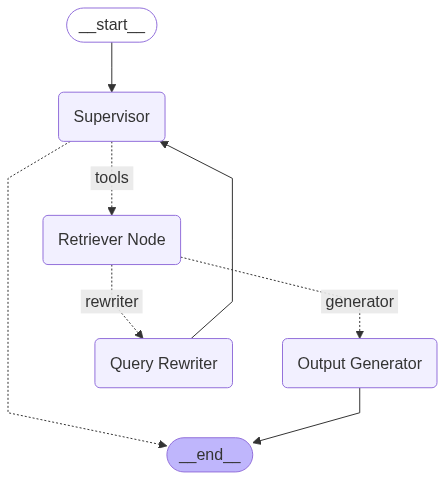

In [36]:
app = workflow.compile()
app

In [37]:
llm_with_tools = llm.bind_tools(tools)

In [38]:
response = llm_with_tools.invoke("What is a LLM powered AI agent?")

In [39]:
response.content

''

In [40]:
response.tool_calls

[{'name': 'retriever_blog_post',
  'args': {'query': 'LLM powered AI agent'},
  'id': 'call_t8repFI5cZ5tkD6kRr7q54fq',
  'type': 'tool_call'}]

In [45]:
response = app.invoke({"messages":["What is a LLM powered AI agent?"]})
response["messages"][-1].content

/Users/rhy/Library/CloudStorage/OneDrive-ArizonaStateUniversity/SelfStudy/Agentic & Gen AI with Cloud/agenticai/lib/python3.13/site-packages/langchain_openai/chat_models/base.py:1656: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(
/Users/rhy/Library/CloudStorage/OneDrive-ArizonaStateUniversity/SelfStudy/Agentic & Gen AI with Cloud/agenticai/lib/python3.13/site-packages/langchain_openai/chat_models/base.py:1669: UserWarning: Cannot use method='json_schema' with model gpt-3.5-turbo since it doesn't support OpenAI's Structured Output API. You can see supported models here: https://platform.openai.com/docs/guides/structured-outputs#supported-models. To fix this warning, set `method='function_calling'. Overriding to method='function_calling'.
  warnings.warn(


The response is satisfactory.


"A LLM powered AI agent is an autonomous agent system where the LLM serves as the agent's brain and is complemented by other key components. The agent learns to call external APIs for additional information that may be missing from the model weights. This system can incorporate features like current information, code execution capability, and access to proprietary sources."